In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import re
import seaborn as sns
# sns.set(style="darkgrid")

In [2]:
txt_files = {}
for file in os.listdir('./'):
    if file.endswith('.txt'):
        with open(file, 'r') as f:
            txt_files[file] = f.read()

In [3]:
table = {'Algorithm': [], 'Dimensionality': [], 'Modes_explored': [], 'Time': []}

In [4]:
list(txt_files.keys())

['results_hmc.txt',
 'results_naf_fix.txt',
 'results_8_hoffman.txt',
 'results_1_wide_normal.txt']

In [5]:
for name in txt_files.keys():
    re_out = re.findall(r'dim (\d{1,3}), n_modes = (\d)[\D]{9}([\d.]*)', txt_files[name])
    for r in re_out:
        table['Algorithm'].append(name[8:-4])
        table['Dimensionality'].append(int(r[0]))
        table['Modes_explored'].append(int(r[1]))
        t = None if r[2]=='' else float(r[2])
        table['Time'].append(t)

In [6]:
df = pd.DataFrame(table)
df.sample(10)

,Algorithm,Dimensionality,Modes_explored,Time
106,1_wide_normal,5,2,126.828182
68,naf_fix,50,1,558.138447
55,naf_fix,100,1,2098.171388
128,1_wide_normal,7,1,147.303456
72,8_hoffman,7,2,693.481654
78,8_hoffman,5,6,715.299369
7,hmc,3,8,741.525479
0,hmc,3,8,736.506449
44,naf_fix,7,1,359.333582
125,1_wide_normal,100,1,413.860962


In [7]:
df.Algorithm.unique()

array(['hmc', 'naf_fix', '8_hoffman', '1_wide_normal'], dtype=object)

In [8]:
subst = {'8_wide_normal': "8 NUTS chains, wide prior",
        'metflow_None_train': "Metflow, deterministic",
         '8_hoffman': "8 NUTS chains, Hoffman-like prior",
        'metflow_free_train': "Metflow, random",
        '1_wide_normal': "1 NUTS chain, wide prior",
        'naf_fix': "NAF",
        'hmc': "MetVAE HMC VI"}

In [9]:
df = df.replace(subst)

In [10]:
grouped = df.groupby(['Algorithm', 'Dimensionality'])[['Modes_explored']]

In [11]:
groups = dict(list(grouped))
groups.keys()

dict_keys([('1 NUTS chain, wide prior', 3), ('1 NUTS chain, wide prior', 5), ('1 NUTS chain, wide prior', 7), ('1 NUTS chain, wide prior', 10), ('1 NUTS chain, wide prior', 20), ('1 NUTS chain, wide prior', 50), ('1 NUTS chain, wide prior', 100), ('8 NUTS chains, Hoffman-like prior', 3), ('8 NUTS chains, Hoffman-like prior', 5), ('8 NUTS chains, Hoffman-like prior', 7), ('8 NUTS chains, Hoffman-like prior', 10), ('8 NUTS chains, Hoffman-like prior', 20), ('8 NUTS chains, Hoffman-like prior', 50), ('8 NUTS chains, Hoffman-like prior', 100), ('MetVAE HMC VI', 3), ('MetVAE HMC VI', 5), ('MetVAE HMC VI', 7), ('MetVAE HMC VI', 10), ('MetVAE HMC VI', 20), ('MetVAE HMC VI', 50), ('MetVAE HMC VI', 100), ('NAF', 3), ('NAF', 5), ('NAF', 7), ('NAF', 10), ('NAF', 20), ('NAF', 50), ('NAF', 100)])

In [12]:
table_to_plot = {'Algorithm': [], 'Dimensionality': [], 'Mean_modes': [], 'Std_modes': [], 'Mean_time': [], 'Std_time': []}

In [13]:
for gr in groups.keys():
    table_to_plot['Algorithm'].append(gr[0])
    table_to_plot['Dimensionality'].append(gr[1])
    table_to_plot['Mean_modes'].append(groups[gr].Modes_explored.mean())
    table_to_plot['Std_modes'].append(groups[gr].Modes_explored.std())
    table_to_plot['Mean_time'].append(groups[gr].Time.mean())
    table_to_plot['Std_time'].append(groups[gr].Time.std())
table_to_plot = pd.DataFrame(table_to_plot)

In [14]:
table_to_plot.fillna(0., inplace=True)
table_to_plot

,Algorithm,Dimensionality,Mean_modes,Std_modes,Mean_time,Std_time
0,"1 NUTS chain, wide prior",3,3.4,1.341641,167.538578,29.963321
1,"1 NUTS chain, wide prior",5,2.4,0.547723,196.513177,61.910185
2,"1 NUTS chain, wide prior",7,1.2,0.447214,147.390939,5.817569
3,"1 NUTS chain, wide prior",10,1.0,0.000000,172.818080,2.020921
4,"1 NUTS chain, wide prior",20,1.0,0.000000,198.966873,1.840148
5,"1 NUTS chain, wide prior",50,1.0,0.000000,228.720550,0.668997
6,"1 NUTS chain, wide prior",100,1.0,0.000000,391.751944,129.512832
7,"8 NUTS chains, Hoffman-like prior",3,6.0,0.707107,630.240032,51.903521
8,"8 NUTS chains, Hoffman-like prior",5,4.2,1.643168,703.572405,50.614792
9,"8 NUTS chains, Hoffman-like prior",7,2.0,1.000000,624.537534,64.616839


In [15]:
for gr in groups.keys():
    print(gr)

('1 NUTS chain, wide prior', 3)
('1 NUTS chain, wide prior', 5)
('1 NUTS chain, wide prior', 7)
('1 NUTS chain, wide prior', 10)
('1 NUTS chain, wide prior', 20)
('1 NUTS chain, wide prior', 50)
('1 NUTS chain, wide prior', 100)
('8 NUTS chains, Hoffman-like prior', 3)
('8 NUTS chains, Hoffman-like prior', 5)
('8 NUTS chains, Hoffman-like prior', 7)
('8 NUTS chains, Hoffman-like prior', 10)
('8 NUTS chains, Hoffman-like prior', 20)
('8 NUTS chains, Hoffman-like prior', 50)
('8 NUTS chains, Hoffman-like prior', 100)
('MetVAE HMC VI', 3)
('MetVAE HMC VI', 5)
('MetVAE HMC VI', 7)
('MetVAE HMC VI', 10)
('MetVAE HMC VI', 20)
('MetVAE HMC VI', 50)
('MetVAE HMC VI', 100)
('NAF', 3)
('NAF', 5)
('NAF', 7)
('NAF', 10)
('NAF', 20)
('NAF', 50)
('NAF', 100)


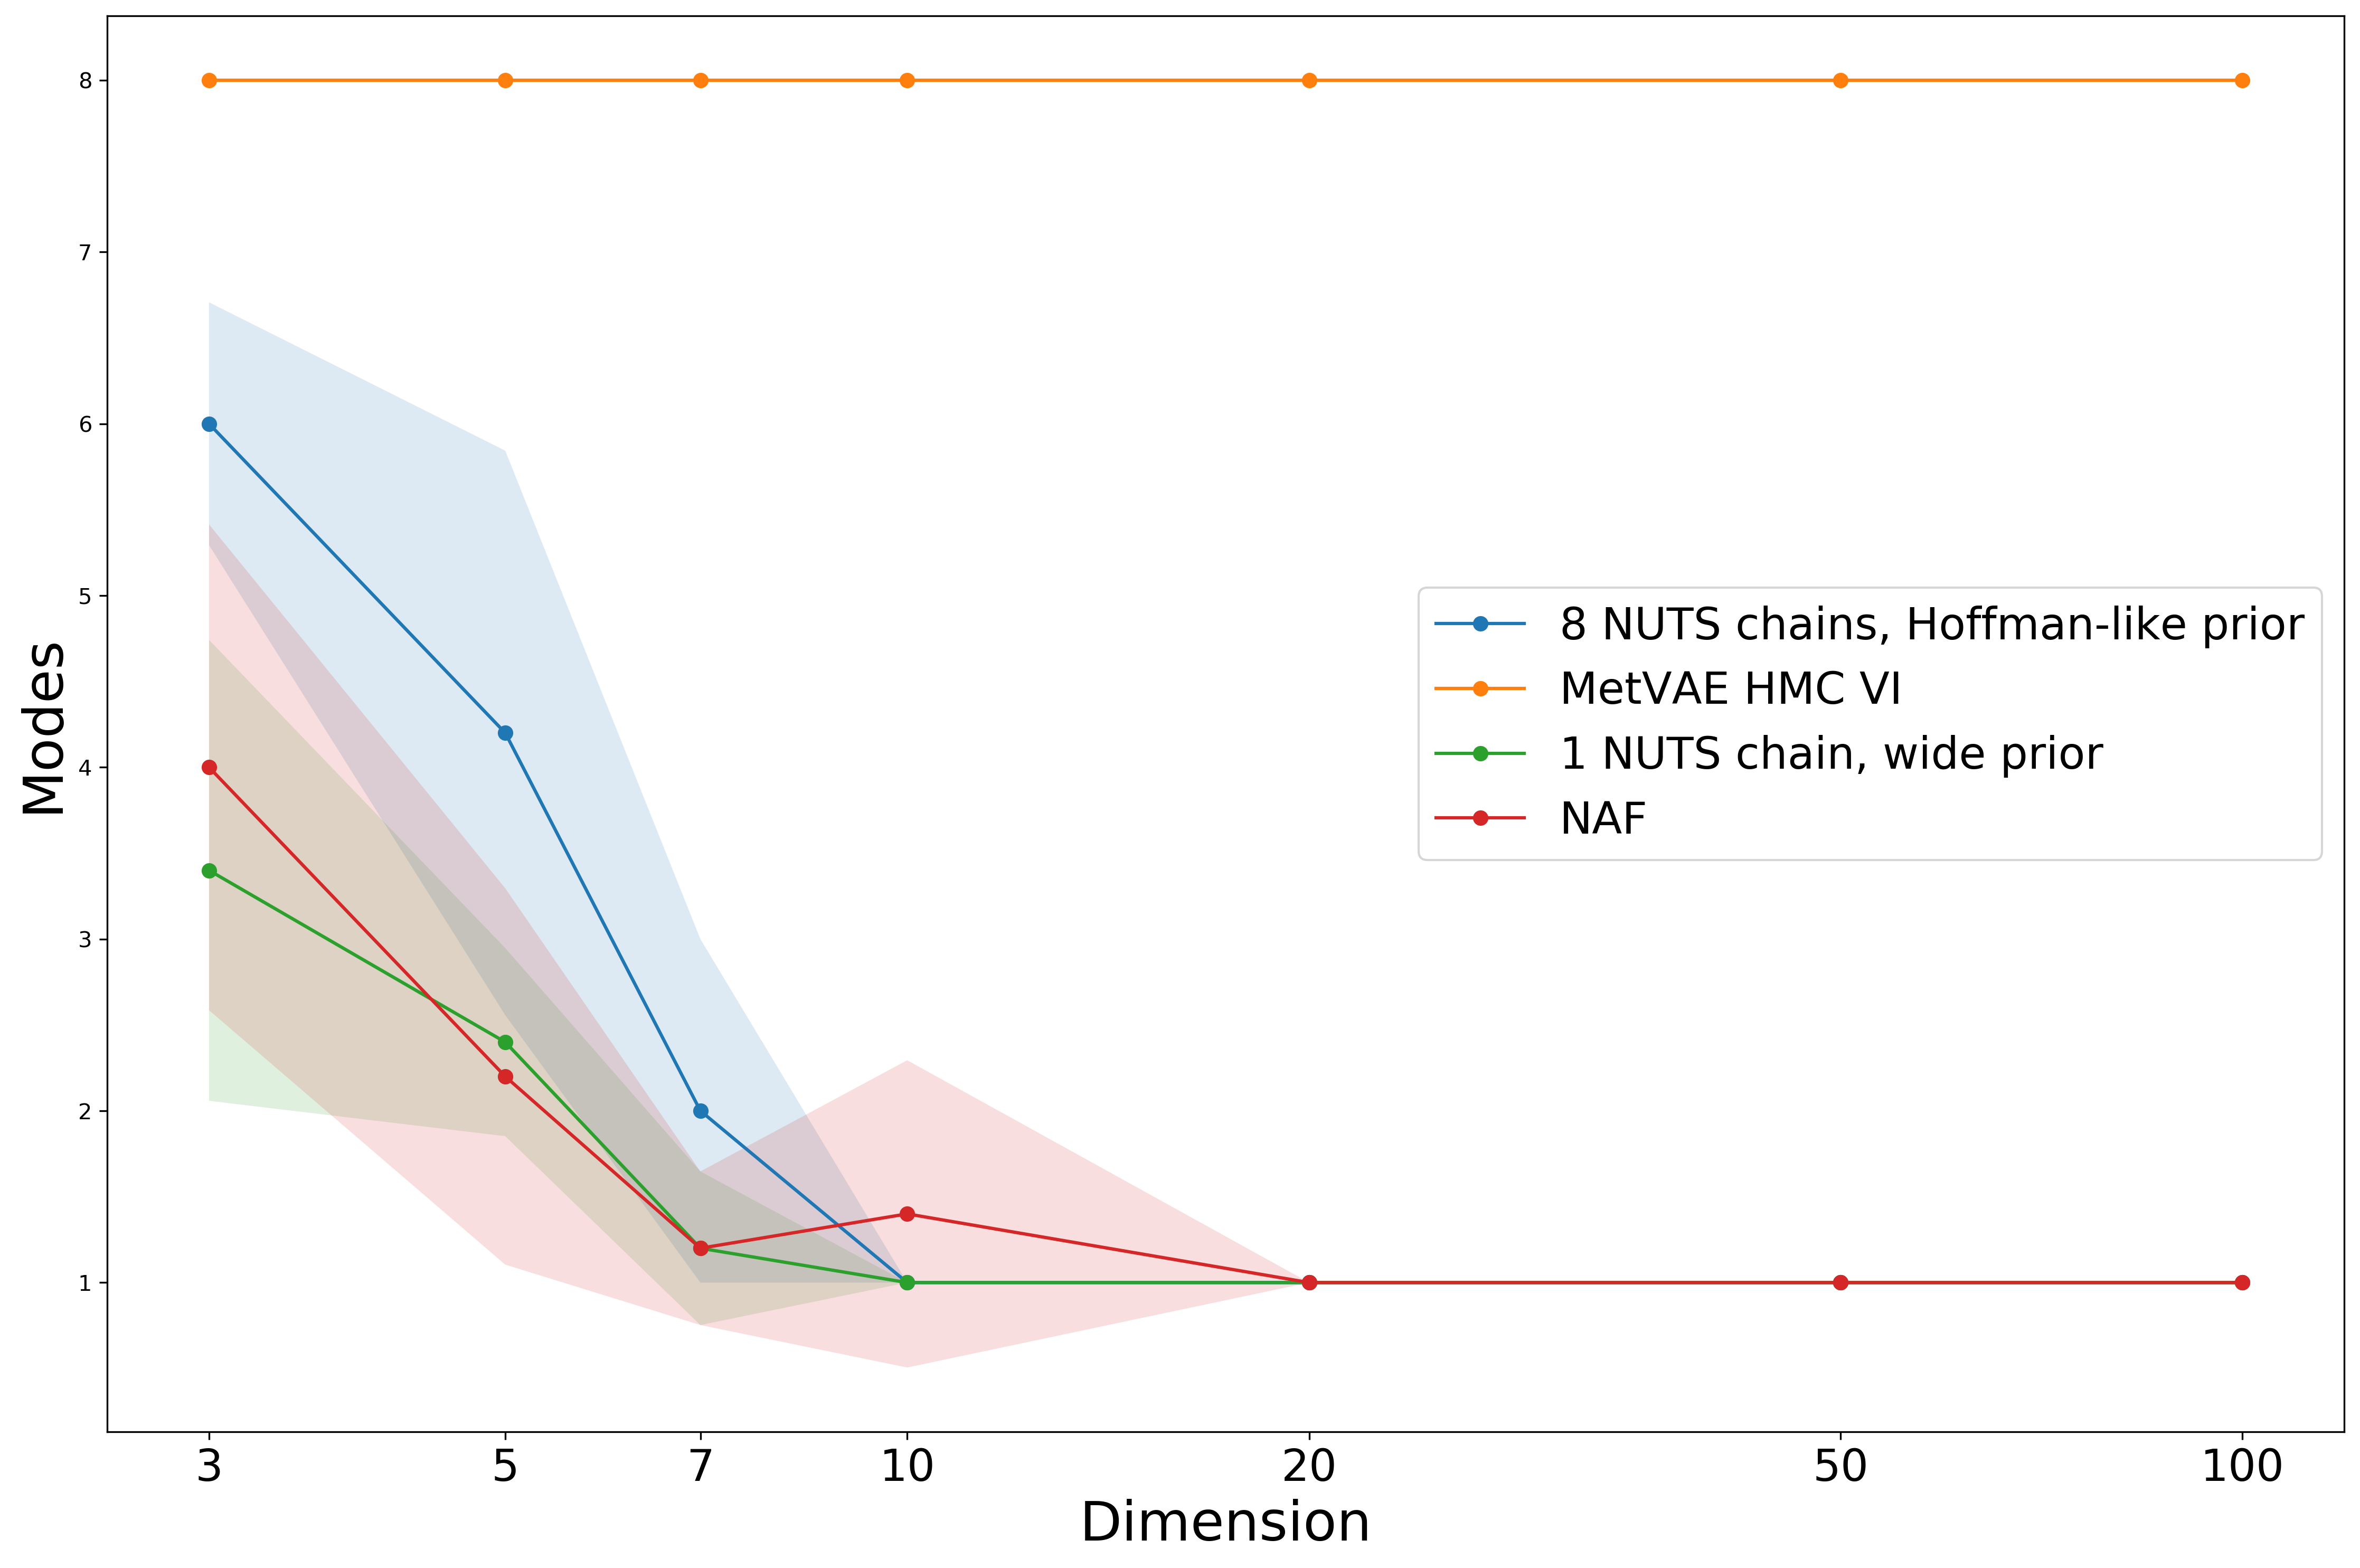

In [16]:
plt.figure(figsize=(15, 10), dpi=300)
dims = [3, 5, 7, 10, 20, 50, 100]
x = np.log(dims)
for alg in list(set(table_to_plot.Algorithm)):
    len_current = table_to_plot[table_to_plot.Algorithm == alg].Mean_modes.shape[0]
    plt.plot(x[:len_current], table_to_plot[table_to_plot.Algorithm == alg].Mean_modes,
             label=alg, marker='o')
    plt.fill_between(x[:len_current],
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_modes - table_to_plot[table_to_plot.Algorithm == alg].Std_modes,
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_modes + table_to_plot[table_to_plot.Algorithm == alg].Std_modes,
                     alpha=.15)
plt.xticks(x, dims, fontsize=20)
plt.yticks(1 + np.arange(8))
plt.xlabel("Dimension", fontsize=25)
plt.ylabel("Modes", fontsize=25)
plt.legend(prop={'size': 20});
plt.tight_layout()
# plt.savefig('./new_s4.png', format='png', dpi=300) 
plt.savefig('./new_s4.pdf', format='pdf', dpi=300)

In [17]:
#table_to_plot = table_to_plot[table_to_plot.Algorithm != '1 NUTS chain, wide prior']

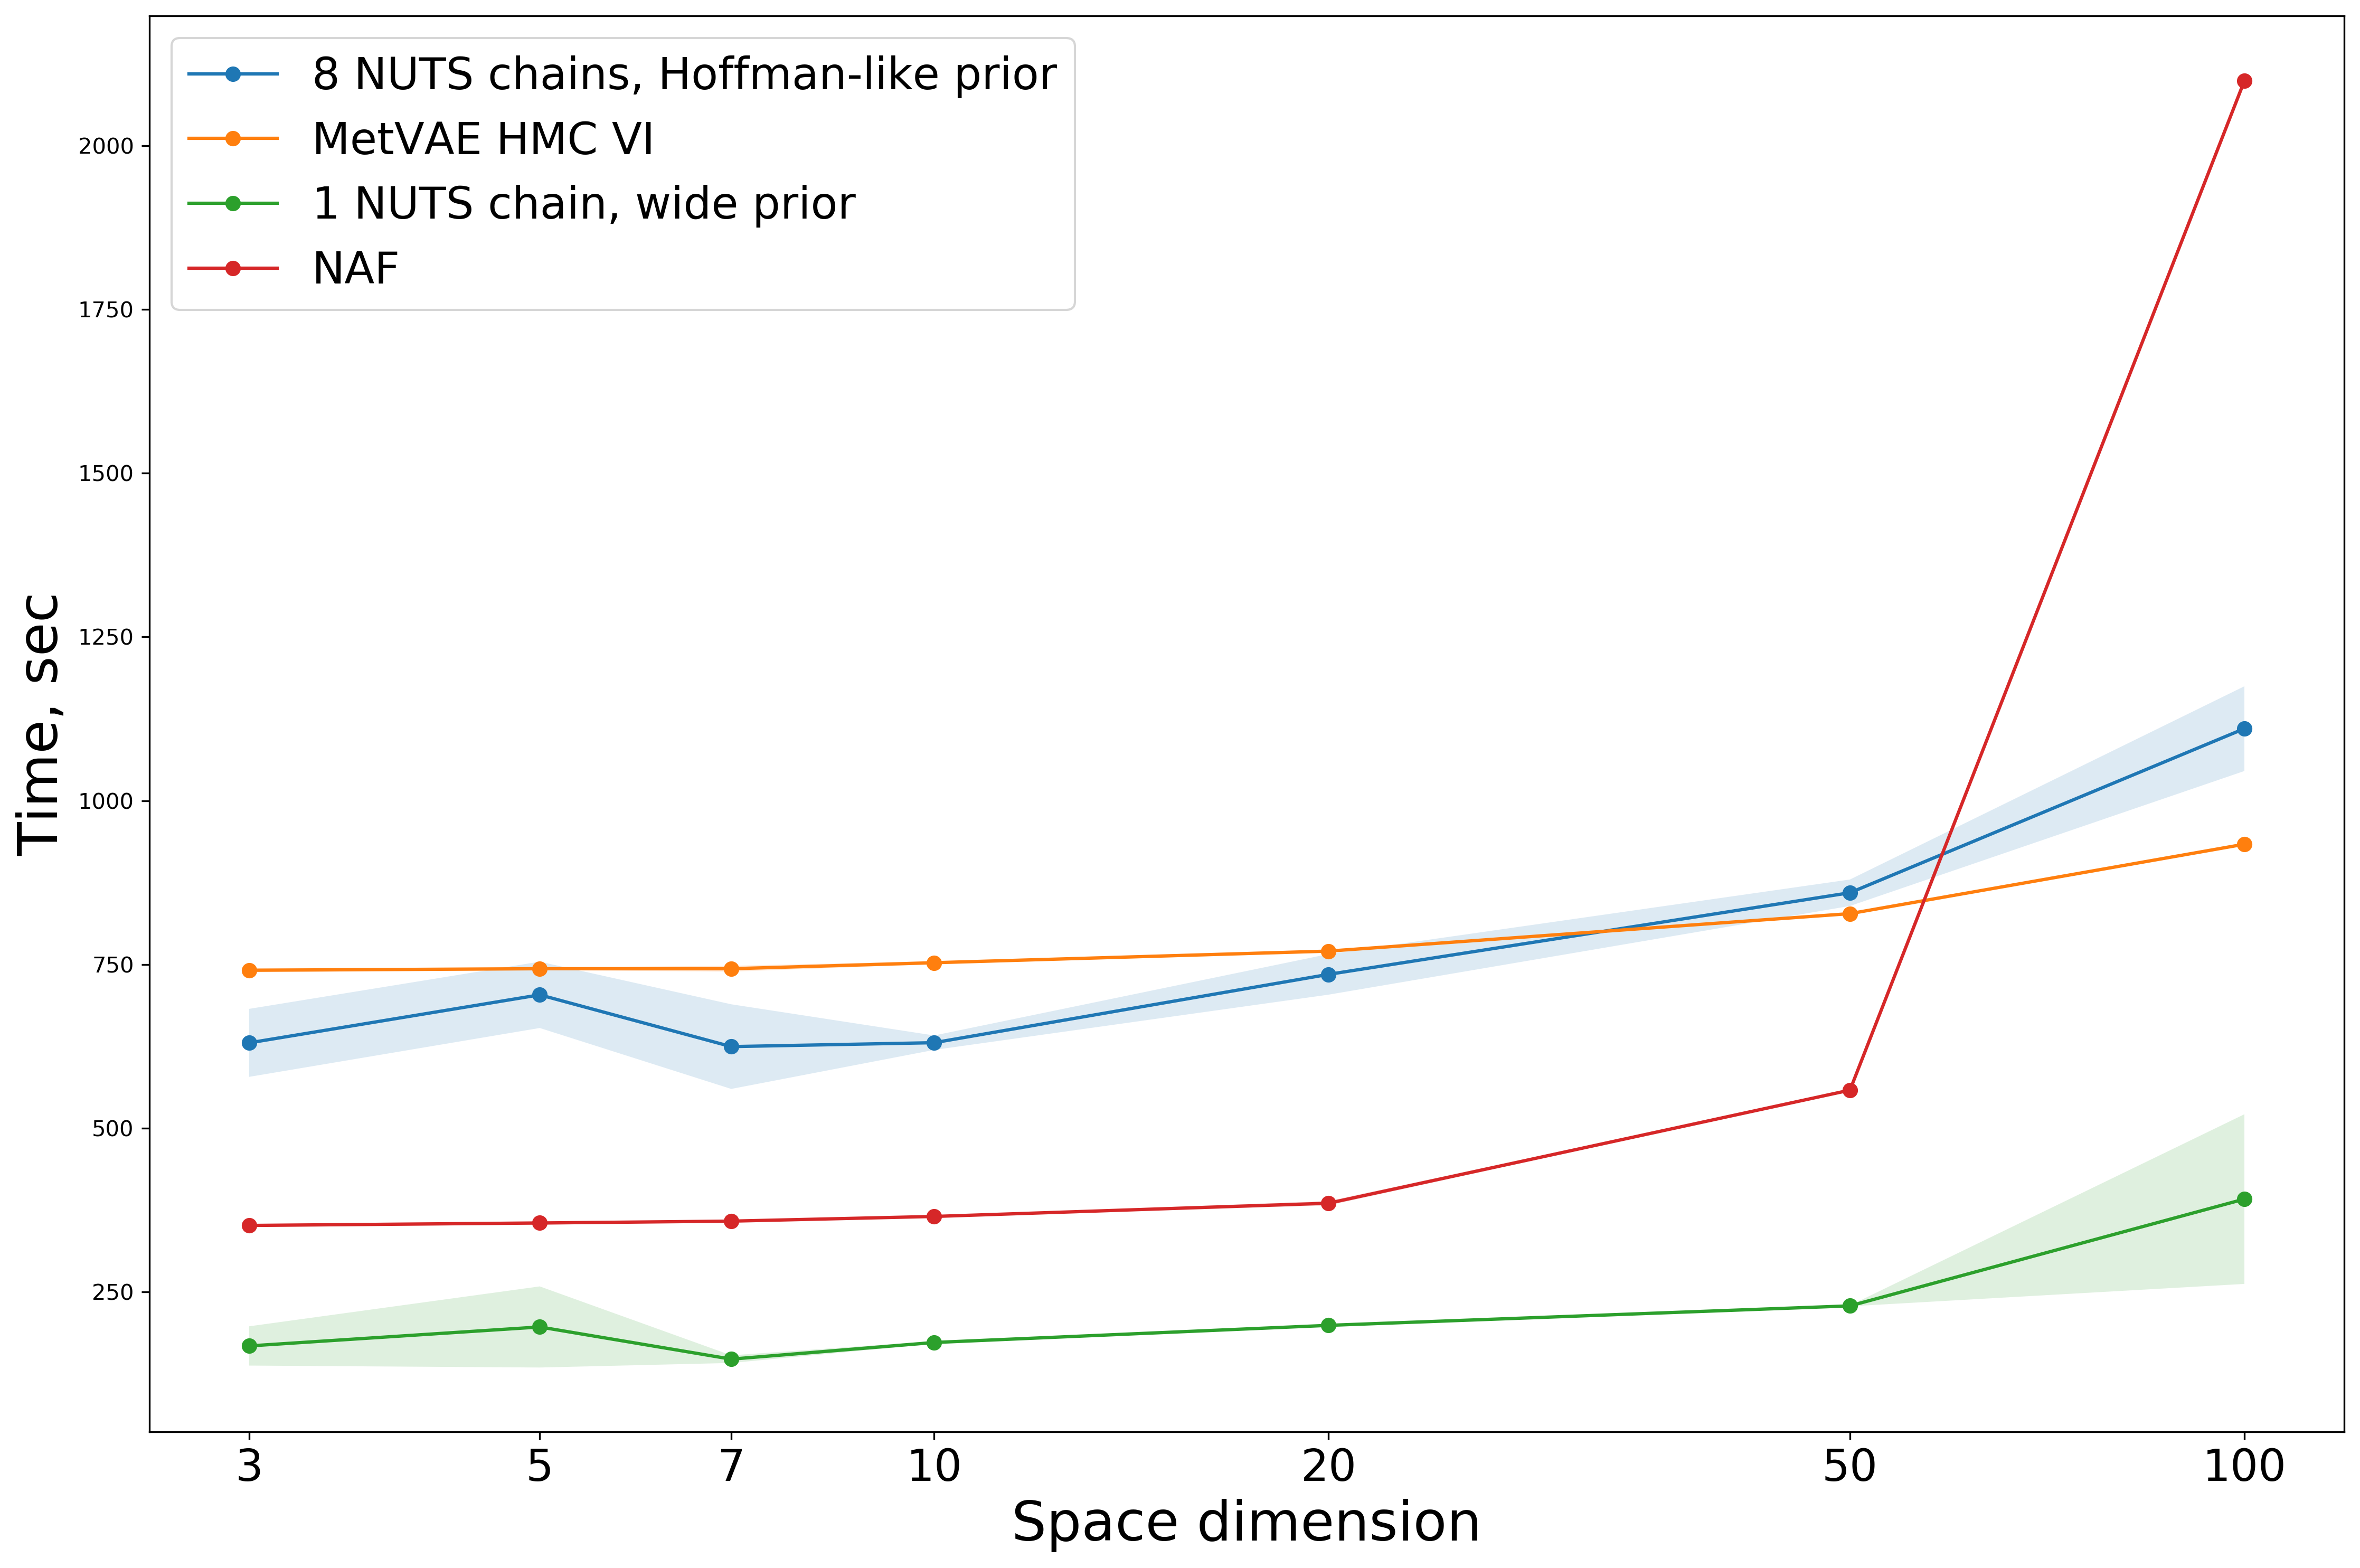

In [18]:
plt.figure(figsize=(15, 10), dpi=300)
dims = [3, 5, 7, 10, 20, 50, 100]
x = np.log(dims)
for alg in list(set(table_to_plot.Algorithm)):
    len_current = table_to_plot[table_to_plot.Algorithm == alg].Mean_time.shape[0]
    plt.plot(x[:len_current], table_to_plot[table_to_plot.Algorithm == alg].Mean_time,
             label=alg, marker='o')
    plt.fill_between(x[:len_current],
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_time - table_to_plot[table_to_plot.Algorithm == alg].Std_time,
                     table_to_plot[table_to_plot.Algorithm == alg].Mean_time + table_to_plot[table_to_plot.Algorithm == alg].Std_time,
                     alpha=.15)
plt.xticks(x, dims, fontsize=20)
plt.xlabel("Space dimension", fontsize=25)
plt.ylabel("Time, sec", fontsize=25)
plt.legend(prop={'size': 20});
plt.tight_layout()
# plt.savefig('./new_s4_time.png', format='png', dpi=300) 
plt.savefig('./new_s4_time.pdf', format='pdf', dpi=300) 